1. Business Understanding: ¶

The project deals with predicting the price of a house based on property features such as area, number of bedrooms, number of bathrooms, and location-related factors.

**Data Understanding******

In [4]:
import pandas as pd
import numpy as np
import random
random.seed(4)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')


In [5]:
df = pd.read_csv(
    r"C:\Users\vetka\OneDrive\Pictures\Desktop\ai\house_prices_bangalore.csv")
df.shape


(1000, 10)

In [6]:
#getting more data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   area           1000 non-null   int64 
 1   location       1000 non-null   object
 2   bhk            1000 non-null   int64 
 3   bath           1000 non-null   int64 
 4   balcony        1000 non-null   int64 
 5   parking        1000 non-null   int64 
 6   furnishing     1000 non-null   object
 7   property_type  1000 non-null   object
 8   age            1000 non-null   int64 
 9   price          1000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 78.2+ KB


In [7]:
df.dtypes


area              int64
location         object
bhk               int64
bath              int64
balcony           int64
parking           int64
furnishing       object
property_type    object
age               int64
price             int64
dtype: object

In [8]:
df.head()

,area,location,bhk,bath,balcony,parking,furnishing,property_type,age,price
0,2065,Bannerghatta Road,2,3,0,1,Semi-Furnished,Independent House,3,17280000
1,1539,Yelahanka,3,1,0,1,Unfurnished,Villa,8,9410000
2,2048,Bannerghatta Road,3,1,2,0,Semi-Furnished,Independent House,10,20300000
3,1233,Sarjapur Road,3,2,1,2,Fully-Furnished,Apartment,12,9060000
4,2487,Yelahanka,3,3,2,1,Fully-Furnished,Villa,4,28660000


In [9]:
df.describe()

,area,bhk,bath,balcony,parking,age,price
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,1648.51100,3.082000,2.557000,1.012000,0.965000,8.040000,1.237301e+07
std,487.90919,1.364235,1.415187,0.802808,0.834549,4.338805,5.386504e+06
min,803.00000,1.000000,1.000000,0.000000,0.000000,1.000000,2.850000e+06
25%,1226.75000,2.000000,1.000000,0.000000,0.000000,4.000000,8.405000e+06
50%,1648.00000,3.000000,2.000000,1.000000,1.000000,8.000000,1.132000e+07
75%,2075.25000,4.000000,3.000000,2.000000,2.000000,12.000000,1.543000e+07
max,2499.00000,5.000000,6.000000,2.000000,2.000000,15.000000,3.273000e+07


In [10]:
df.columns

Index(['area', 'location', 'bhk', 'bath', 'balcony', 'parking', 'furnishing',
       'property_type', 'age', 'price'],
      dtype='object')

In [11]:
#checking distribution of target variable
df['price'].describe()


count    1.000000e+03
mean     1.237301e+07
std      5.386504e+06
min      2.850000e+06
25%      8.405000e+06
50%      1.132000e+07
75%      1.543000e+07
max      3.273000e+07
Name: price, dtype: float64

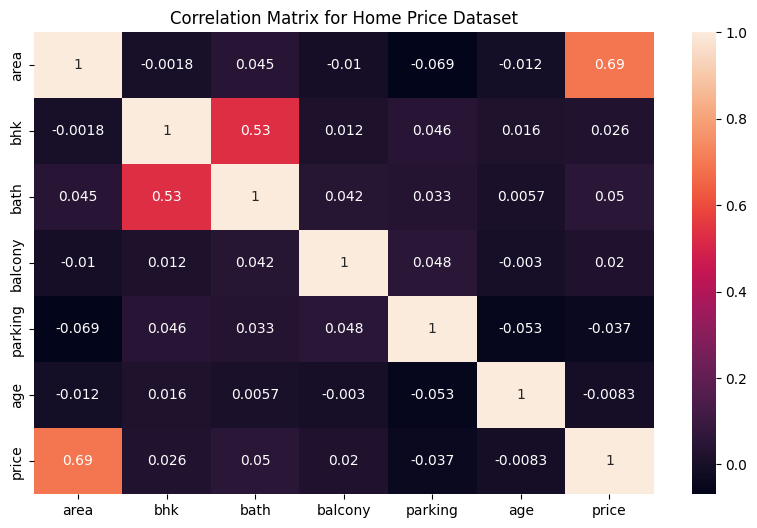

In [12]:
#drawing the correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Correlation Matrix for Home Price Dataset")
plt.show()


# Data Preparation

In [13]:
# checking missing values
df.isna().sum()

area             0
location         0
bhk              0
bath             0
balcony          0
parking          0
furnishing       0
property_type    0
age              0
price            0
dtype: int64

In [14]:
#checking for duplicates
df.duplicated().any()

False

In [15]:
# Again checking the size of data
df.shape

(1000, 10)

**Data Preprocessing:**

In [16]:
cate_val = []
cont_val = []

for column in df.columns:
    if df[column].dtype == 'object':
        cate_val.append(column)
    else:
        cont_val.append(column)

cate_val
cont_val


['area', 'bhk', 'bath', 'balcony', 'parking', 'age', 'price']

Feature Scaling

In [17]:
df.head()

,area,location,bhk,bath,balcony,parking,furnishing,property_type,age,price
0,2065,Bannerghatta Road,2,3,0,1,Semi-Furnished,Independent House,3,17280000
1,1539,Yelahanka,3,1,0,1,Unfurnished,Villa,8,9410000
2,2048,Bannerghatta Road,3,1,2,0,Semi-Furnished,Independent House,10,20300000
3,1233,Sarjapur Road,3,2,1,2,Fully-Furnished,Apartment,12,9060000
4,2487,Yelahanka,3,3,2,1,Fully-Furnished,Villa,4,28660000


In [18]:
st=StandardScaler()
df[cont_val]=st.fit_transform(df[cont_val])


In [19]:
df.head()

,area,location,bhk,bath,balcony,parking,furnishing,property_type,age,price
0,0.854047,Bannerghatta Road,-0.793515,0.313190,-1.261206,0.041960,Semi-Furnished,Independent House,-1.162192,0.911435
1,-0.224562,Yelahanka,-0.060137,-1.100759,-1.261206,0.041960,Unfurnished,Villa,-0.009224,-0.550356
2,0.819187,Bannerghatta Road,-0.060137,-1.100759,1.231296,-1.156892,Semi-Furnished,Independent House,0.451963,1.472376
3,-0.852042,Sarjapur Road,-0.060137,-0.393785,-0.014955,1.240812,Fully-Furnished,Apartment,0.913150,-0.615365
4,1.719395,Yelahanka,-0.060137,0.313190,1.231296,0.041960,Fully-Furnished,Villa,-0.931598,3.025179


splitting the dataset into Training set and Test set

In [20]:
#Creating Independent variables
X = df.drop('price', axis=1)



In [21]:
X

,area,location,bhk,bath,balcony,parking,furnishing,property_type,age
0,0.854047,Bannerghatta Road,-0.793515,0.313190,-1.261206,0.041960,Semi-Furnished,Independent House,-1.162192
1,-0.224562,Yelahanka,-0.060137,-1.100759,-1.261206,0.041960,Unfurnished,Villa,-0.009224
2,0.819187,Bannerghatta Road,-0.060137,-1.100759,1.231296,-1.156892,Semi-Furnished,Independent House,0.451963
3,-0.852042,Sarjapur Road,-0.060137,-0.393785,-0.014955,1.240812,Fully-Furnished,Apartment,0.913150
4,1.719395,Yelahanka,-0.060137,0.313190,1.231296,0.041960,Fully-Furnished,Villa,-0.931598
...,...,...,...,...,...,...,...,...,...
995,-0.755664,Bellandur,0.673241,-1.100759,-1.261206,0.041960,Fully-Furnished,Apartment,-0.701004
996,-0.126134,HSR Layout,0.673241,-0.393785,-1.261206,0.041960,Unfurnished,Villa,0.682557
997,0.669494,Indiranagar,-1.526894,-1.100759,1.231296,0.041960,Semi-Furnished,Apartment,-1.392785
998,-1.688681,Jayanagar,1.406620,-0.393785,1.231296,0.041960,Fully-Furnished,Independent House,-0.470411


In [22]:
#Creating Dependent variable
y = df['price']
y


0      0.911435
1     -0.550356
2      1.472376
3     -0.615365
4      3.025179
         ...   
995   -0.366471
996   -0.678518
997   -0.349754
998   -1.412199
999   -0.072998
Name: price, Length: 1000, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [24]:
X_train

,area,location,bhk,bath,balcony,parking,furnishing,property_type,age
29,-0.076920,HSR Layout,1.406620,1.020164,-0.014955,1.240812,Fully-Furnished,Independent House,1.143744
535,1.098067,Whitefield,1.406620,1.727138,-1.261206,-1.156892,Fully-Furnished,Villa,1.143744
695,-1.563595,Yelahanka,1.406620,-1.100759,-0.014955,1.240812,Semi-Furnished,Independent House,0.221370
557,-0.562909,Uttarahalli,-0.793515,0.313190,-0.014955,1.240812,Fully-Furnished,Independent House,-1.162192
836,0.206061,Electronic City,0.673241,0.313190,-0.014955,1.240812,Unfurnished,Villa,-1.392785
...,...,...,...,...,...,...,...,...,...
106,-0.852042,Marathahalli,-1.526894,-1.100759,1.231296,-1.156892,Unfurnished,Independent House,-0.239817
270,-0.111780,Kengeri,0.673241,1.727138,-0.014955,0.041960,Fully-Furnished,Apartment,-0.701004
860,0.562864,Jayanagar,-1.526894,-0.393785,1.231296,0.041960,Fully-Furnished,Villa,-1.162192
435,1.415908,BTM Layout,-0.793515,-0.393785,-1.261206,1.240812,Fully-Furnished,Apartment,1.604931


In [25]:
y_train

29    -0.084143
535    3.077187
695   -1.438203
557   -0.858687
836    1.086032
         ...   
106   -0.401762
270    0.460081
860    2.451236
435   -0.550356
102    0.027302
Name: price, Length: 800, dtype: float64

In [26]:
X_test

,area,location,bhk,bath,balcony,parking,furnishing,property_type,age
521,-1.200641,Whitefield,1.406620,0.313190,-0.014955,-1.156892,Semi-Furnished,Apartment,1.143744
737,1.046802,Rajajinagar,-0.060137,-1.100759,1.231296,1.240812,Semi-Furnished,Independent House,-0.931598
740,-0.891003,Koramangala,-0.793515,-0.393785,1.231296,1.240812,Semi-Furnished,Apartment,1.143744
660,1.592258,Banashankari,-0.060137,-1.100759,-0.014955,-1.156892,Semi-Furnished,Villa,-0.009224
411,0.882755,Sarjapur Road,-0.793515,-1.100759,-0.014955,-1.156892,Fully-Furnished,Apartment,-0.009224
...,...,...,...,...,...,...,...,...,...
408,-0.366052,JP Nagar,1.406620,-1.100759,1.231296,1.240812,Semi-Furnished,Villa,-0.009224
332,-0.860244,Electronic City,-0.060137,0.313190,-1.261206,1.240812,Semi-Furnished,Villa,-0.701004
208,-0.152791,Marathahalli,-0.060137,0.313190,-1.261206,1.240812,Unfurnished,Apartment,-1.162192
613,0.948374,Whitefield,-0.060137,0.313190,1.231296,1.240812,Unfurnished,Independent House,-1.623379


In [27]:
y_test

521   -1.441918
737    1.412938
740   -0.834541
660    1.524383
411   -0.745385
         ...   
408    0.655110
332    0.324490
208   -0.190016
613    1.026595
78    -0.110147
Name: price, Length: 200, dtype: float64

# EDA

In [28]:
#finding count of houses based on BHK
df['bhk'].value_counts()



bhk
-0.060137    229
-0.793515    205
 1.406620    204
 0.673241    201
-1.526894    161
Name: count, dtype: int64

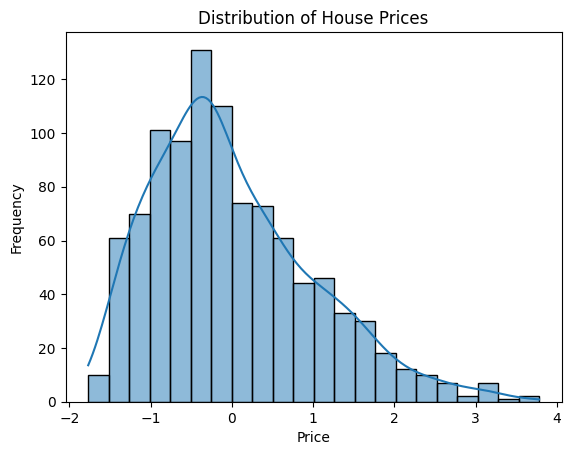

In [29]:
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


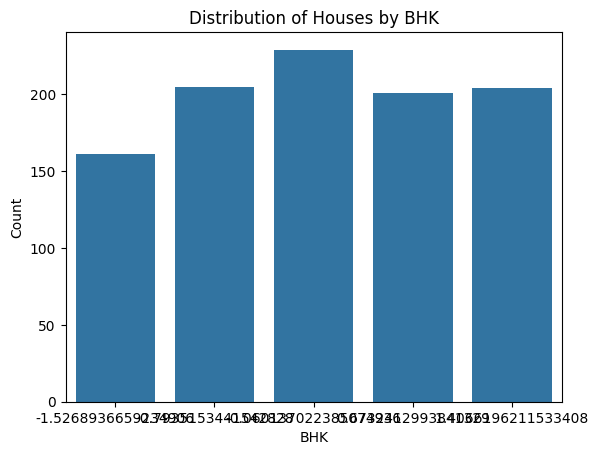

In [30]:
sns.countplot(x='bhk', data=df)
plt.title('Distribution of Houses by BHK')
plt.xlabel('BHK')
plt.ylabel('Count')
plt.show()


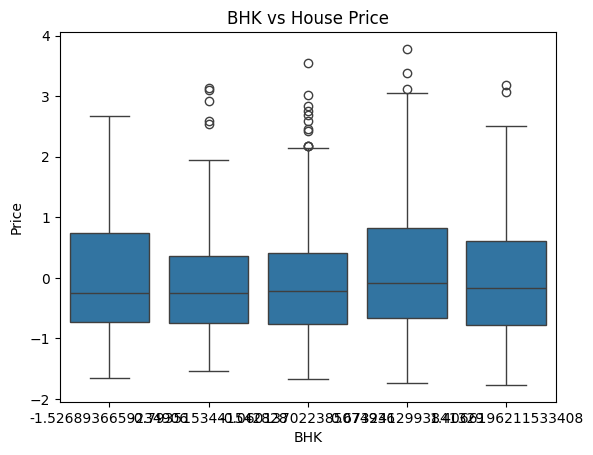

In [31]:
sns.boxplot(x='bhk', y='price', data=df)
plt.title('BHK vs House Price')
plt.xlabel('BHK')
plt.ylabel('Price')
plt.show()


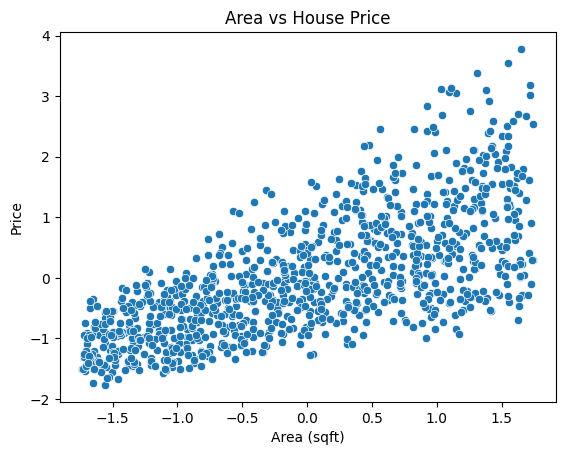

In [32]:
sns.scatterplot(x='area', y='price', data=df)
plt.title('Area vs House Price')
plt.xlabel('Area (sqft)')
plt.ylabel('Price')
plt.show()


# Check BHK Type

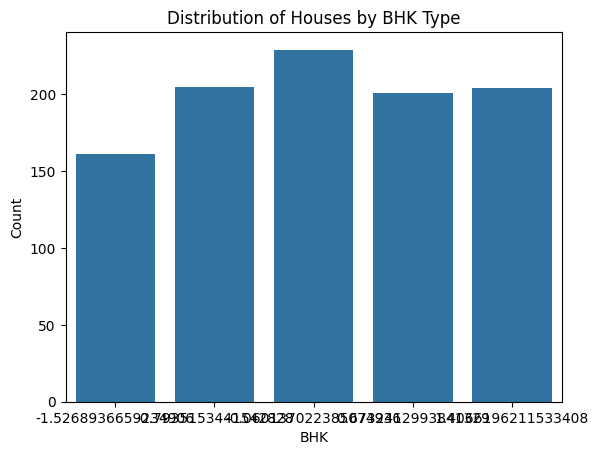

In [33]:
#1️⃣ Plotting BHK distribution (like cp countplot)
sns.countplot(x='bhk', data=df)
plt.title('Distribution of Houses by BHK Type')
plt.xlabel('BHK')
plt.ylabel('Count')
plt.show()


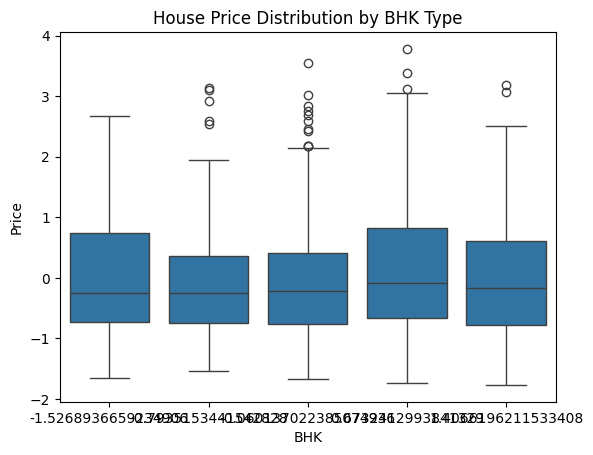

In [34]:
#BHK distribution as per target
sns.boxplot(x='bhk', y='price', data=df)
plt.title('House Price Distribution by BHK Type')
plt.xlabel('BHK')
plt.ylabel('Price')
plt.show()


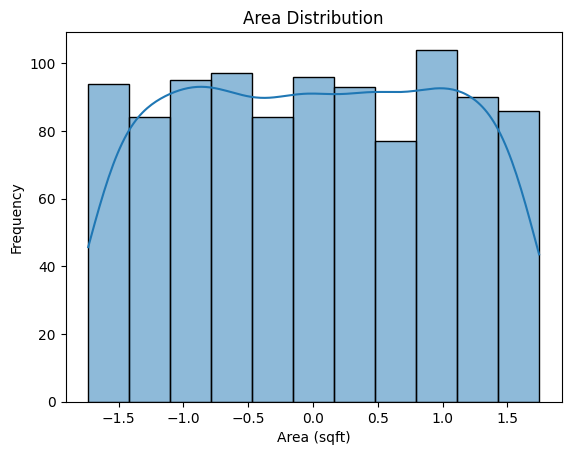

In [35]:
sns.histplot(df['area'], kde=True)
plt.title('Area Distribution')
plt.xlabel('Area (sqft)')
plt.ylabel('Frequency')
plt.show()


# Model Selection

As per the above processing, this is a regression problem because the target variable house price is continuous.
Different regression models can be used for prediction.
In this project, we will use the regression models studied so far and select the best model based on performance metrics like R² score and RMSE.

In [36]:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_squared_error



In [37]:
#Split Features & Target
X = df.drop('price', axis=1)   # target = house price
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [38]:
#Identify Columns
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns


Preprocessing Pipeline

In [39]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])


**Model 1: Linear Regression**

In [40]:
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

lr_pipeline.fit(X_train, y_train)

y_pred_lr = lr_pipeline.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


Linear Regression R2: 0.6323488293286929
Linear Regression RMSE: 0.6146397187056007


**Model 2: Decision Tree Regression**

In [41]:
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(random_state=42))
])

dt_pipeline.fit(X_train, y_train)

y_pred_dt = dt_pipeline.predict(X_test)

print("Decision Tree R2:", r2_score(y_test, y_pred_dt))
print("Decision Tree RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))


Decision Tree R2: 0.19057617181937503
Decision Tree RMSE: 0.9119911783305952


**Model 3: Random Forest Regression**

In [42]:
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)

y_pred_rf = rf_pipeline.predict(X_test)

print("Random Forest R2:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Random Forest R2: 0.5965142916014317
Random Forest RMSE: 0.6438974765204284


# Final Model Comparison

In [43]:
# Model Selection - Final Comparison

# Store model results
model_results = {
    "Linear Regression": {
        "R2": r2_score(y_test, y_pred_lr),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_lr))
    },
    "Decision Tree Regressor": {
        "R2": r2_score(y_test, y_pred_dt),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_dt))
    },
    "Random Forest Regressor": {
        "R2": r2_score(y_test, y_pred_rf),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_rf))
    }
}

# Print results
for model, metrics in model_results.items():
    print(f"{model}")
    print(f"R2 Score : {metrics['R2']:.4f}")
    print(f"RMSE     : {metrics['RMSE']:.4f}")
    print("-" * 30)

# Select best model (Highest R2)
best_model = max(model_results, key=lambda x: model_results[x]["R2"])

print("Selected Model based on performance:")
print(best_model)


Linear Regression
R2 Score : 0.6323
RMSE     : 0.6146
------------------------------
Decision Tree Regressor
R2 Score : 0.1906
RMSE     : 0.9120
------------------------------
Random Forest Regressor
R2 Score : 0.5965
RMSE     : 0.6439
------------------------------
Selected Model based on performance:
Linear Regression


In [ ]:
import pickle
pickle.dump(lr, open("model.pkl", "wb"))

